## 1.6 Exam vB, PROBLEM 1  
Maximum Points = 14

A courier company operates a fleet of delivery trucks that make deliveries to different parts of the city.  
The trucks are equipped with GPS tracking devices that record the location of each truck at regular intervals.  
The locations are divided into three regions: **downtown**, **the suburbs**, and **the countryside**,  
however there is always the possibility the truck breaks down and it goes to the **workshop**.

The following table shows the probabilities of a truck transitioning between these regions at each time step:

Current region | Probability of transitioning to downtown | Probability of transitioning to the suburbs | Probability of transitioning to the countryside | Probability of transitioning to the Workshop
---|---|---|---|---
Downtown | 0.3 | 0.7 | 0 | 0
Suburbs | 0.2 | 0.5 | 0.3 | 0
Countryside | 0 | 0 | 0.5 | 0.5
Workshop | 0 | 0 | 0 | 1

1. If a truck is currently in the downtown, what is the probability that it will be in the countryside region after 10 time steps? **[2p]**

2. If a truck is currently in the downtown, what is the probability that it will be in the countryside region the first time after three time steps or more? **[2p]**

3. Is this Markov chain irreducible? Explain your answer. **[3p]**

4. What is the stationary distribution? Furthermore is it reversible? (Explain your answer) **[3p]**

5. **Advanced question:** What is the expected number of steps it takes starting from the Downtown region to first reach the Workshop?

   *Hint:* to get within 1 decimal point, it is enough to compute the probabilities for hitting times below 50.  
   Motivate your answer in detail. **[4p]**

   You could also solve this question by simulation, but this gives you a maximum of **[2p]**.


---
## 1. [2p]

If a truck is currently in the downtown, what is the probability that it will be in the countryside region after 10 time steps?

We model the regions as states of a Markov chain:

- Downtown (D)
- Suburbs (S)
- Countryside (C)
- Workshop (W)

We order the states as:  
$((D, S, C, W) \equiv (0,1,2,3))$.

From the table we get the transition matrix

$$
P =
\begin{pmatrix}
0.3 & 0.7 & 0   & 0   \\
0.2 & 0.5 & 0.3 & 0   \\
0   & 0   & 0.5 & 0.5 \\
0   & 0   & 0   & 1
\end{pmatrix},
$$

where each row corresponds to the current region and each column to the next region.

Since the truck starts in downtown, the initial distribution is

$$
\pi^{(0)} = (1, 0, 0, 0).
$$

For a Markov chain, the distribution after \(n\) time steps is

$$
\pi^{(n)} = \pi^{(0)} P^n.
$$

We are interested in the distribution after 10 steps:

$$
\pi^{(10)} = \pi^{(0)} P^{10}.
$$

The probability that the truck is in the countryside after 10 steps, given that it started in downtown, is the countryside component (index 2) of $(\pi^{(10)})$, or equivalently the $((D,C))$ entry of $(P^{10})$:

$$
\mathbb{P}(X_{10} = \text{C} \mid X_0 = \text{D}) = \big(\pi^{(10)}\big)_2 = (P^{10})_{D,C}.
$$

Computing $(P^{10})$ numerically (e.g. using NumPy) gives

$$
(P^{10})_{D,C} \approx 0.0848735349.
$$

Thus, the required probability is approximately

$$
\boxed{0.0849}.
$$


In [67]:
import numpy as np

# Transition matrix P, with states ordered as: [Downtown, Suburbs, Countryside, Workshop]
P = np.array([
    [0.3, 0.7, 0.0, 0.0],  # From Downtown
    [0.2, 0.5, 0.3, 0.0],  # From Suburbs
    [0.0, 0.0, 0.5, 0.5],  # From Countryside
    [0.0, 0.0, 0.0, 1.0]   # From Workshop
])

# Initial distribution: starting in Downtown

# Compute P^10
P10 = np.linalg.matrix_power(P, 10)

# THIS PART ALSO WORKS 
#pi0 = np.array([1.0, 0.0, 0.0, 0.0])
# Distribution after 10 steps
#pi10 = pi0 @ P10
# Probability of being in the Countryside (index 2) after 10 steps
#problem1_p1 = pi10[2]

# This also works:
problem1_p1 = P10[0][2]

print("P^10 =\n", P10)
#print("Distribution after 10 steps:", pi10)
print("Probability of being in countryside after 10 steps:", problem1_p1)


P^10 =
 [[3.39352311e-02 8.26829080e-02 8.48735349e-02 7.98508326e-01]
 [2.36236880e-02 5.75589191e-02 5.96851134e-02 8.59132280e-01]
 [0.00000000e+00 0.00000000e+00 9.76562500e-04 9.99023438e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Probability of being in countryside after 10 steps: 0.08487353489999999


-----
2. If a truck is currently in the downtown, what is the probability that it will be in the countryside region the first time after three time steps or more? **[2p]**
-----

---
## 2. [2p]

If a truck is currently in the downtown, what is the probability that it will be in the countryside region **for the first time** after three time steps or more?

We denote by $(T_C)$ the first hitting time of the Countryside, and we want

$$
\mathbb{P}(T_C \ge 3 \mid X_0 = D).
$$

This means the truck must *not* be in the Countryside at step 1 and step 2.

The transition matrix (states ordered as $(D,S,C,W)$ is

$$
P =
\begin{pmatrix}
0.3 & 0.7 & 0   & 0   \\
0.2 & 0.5 & 0.3 & 0   \\
0   & 0   & 0.5 & 0.5 \\
0   & 0   & 0   & 1
\end{pmatrix}.
$$

Since the truck starts in Downtown:

$$
\pi^{(0)} = (1, 0, 0, 0).
$$

**Step 1:**

$$
\pi^{(1)} = \pi^{(0)} P = (0.3,\, 0.7,\, 0,\, 0).
$$

Thus,

$$
\mathbb{P}(X_1 = C) = 0.
$$

**Step 2:**

$$
\pi^{(2)} = \pi^{(1)} P.
$$

The probability of being in the countryside at step 2 is

$$
\mathbb{P}(X_2 = C)
= 0.3 \cdot 0 + 0.7 \cdot 0.3
= 0.21.
$$

Therefore,

$$
\mathbb{P}(X_2 \neq C) = 1 - 0.21 = 0.79.
$$

Since step 1 is automatically safe, this gives

$$
\boxed{\mathbb{P}(T_C \ge 3) = 0.79}.
$$


---
### 2. [2p]

If a truck is currently in the downtown, what is the probability that it will be in the countryside region **for the first time** after three time steps or more?

We label the states as:

- 0: Downtown (D)  
- 1: Suburbs (S)  
- 2: Countryside (C)  
- 3: Workshop (W)

The transition matrix is:

$$
P =
\begin{pmatrix}
0.3 & 0.7 & 0   & 0   \\
0.2 & 0.5 & 0.3 & 0   \\
0   & 0   & 0.5 & 0.5 \\
0   & 0   & 0   & 1
\end{pmatrix}.
$$

Let $(T_C)$ be the first time the chain enters the countryside (state 2).  
We want

$$
\mathbb{P}(T_C \ge 3 \mid X_0 = 0).
$$

This means the truck must **not** be in the countryside at step 1 and step 2.

A key fact for Markov chains is:

> If the chain starts in state $(i)$, then  
> $((P^n)_{i,j} = \mathbb{P}(X_n = j \mid X_0 = i).)$

---

### Why do we use $(P)$ and $(P^2)$, but *not* $(P^3)$?

To compute  
$(\mathbb{P}(T_C \ge 3))$,  
we use the identity:

$$
\mathbb{P}(T_C \ge 3)
= 1 - \mathbb{P}(T_C < 3)
= 1 - \mathbb{P}(T_C = 1) - \mathbb{P}(T_C = 2).
$$

We **do not use** $(P^3)$ because:

- $((P^3)_{0,2})$ is the probability of being in countryside *at step 3*,  
  **including** paths that entered countryside at step 2 or step 1.

But we need **first arrival**, not “being there”.

Therefore we must compute:

- $(T_C = 1)$ using $(P)$
- $(T_C = 2)$ using $(P^2)$

and subtract from 1.

---

### Step 1: First arrival at step 1

Starting from Downtown:

$$
\mathbb{P}(T_C = 1) = P_{0,2} = 0.
$$

It is impossible to reach countryside in 1 step.

---

### Step 2: First arrival at step 2

Since we cannot reach countryside at step 1, the first possible arrival time is step 2.

This probability is:

$$
\mathbb{P}(T_C = 2)
= (P^2)_{0,2}.
$$

Compute row 0 of $(P^2)$:

$$
(P^2)_{0,2}
= 0.3 \cdot 0 + 0.7 \cdot 0.3
= 0.21.
$$

---

### Final step

$$
\mathbb{P}(T_C \ge 3)
= 1 - 0 - 0.21
= 0.79.
$$

Thus, the answer is:

$$
\boxed{0.79}.


In [68]:
# Part 2
# Fill in the answer to part 2 below'

P = np.array([
    [0.3, 0.7, 0.0, 0.0],
    [0.2, 0.5, 0.3, 0.0],
    [0.0, 0.0, 0.5, 0.5],
    [0.0, 0.0, 0.0, 1.0]
])

# Compute P^1 and P^2
P1 = P
P2 = P @ P  # or np.linalg.matrix_power(P, 2)

# First arrival at step 1: impossible
T1 = P1[0][2]

# First arrival at step 2:
T2 = P2[0][2]

# Probability first time occurs at step >= 3
problem1_p2 = 1 - (T1 + T2)

print("P^2 =\n", P2)
print("Probability T_C >= 3 =", problem1_p2)



P^2 =
 [[0.23 0.56 0.21 0.  ]
 [0.16 0.39 0.3  0.15]
 [0.   0.   0.25 0.75]
 [0.   0.   0.   1.  ]]
Probability T_C >= 3 = 0.79


3. Is this Markov chain irreducible? Explain your answer. **[3p]**



---

## 3. [3p]
Is this Markov chain irreducible? Explain your answer.

We have the transition matrix
$$
P = \begin{pmatrix}
0.3 & 0.7 & 0.0 & 0.0 \\
0.2 & 0.5 & 0.3 & 0.0 \\
0.0 & 0.0 & 0.5 & 0.5 \\
0.0 & 0.0 & 0.0 & 1.0
\end{pmatrix},
$$
with states (in order) Downtown (D), Suburbs (S), Countryside (C), and Workshop (W).

A Markov chain is **irreducible** if for every pair of states $(i,j)$ there exists an integer $(n \ge 0)$ such that
$$
(P^n)_{ij} > 0,
$$
i.e. every state can reach every other state (they all belong to one single communicating class).

From the rows of $(P)$ we see the possible transitions:

- From D: to D with probability $(0.3)$, to S with probability $(0.7)$.
- From S: to D with probability $(0.2)$, to S with probability $(0.5)$, to C with probability $(0.3)$.
- From C: to C with probability $(0.5)$, to W with probability $(0.5)$.
- From W: to W with probability $(1.0)$.

Hence we have the following directed edges with positive probability:

- $(D \to D)$, $(D \to S)$
- $(S \to D)$, $(S \to S)$, $(S \to C)$
- $(C \to C)$, $(C \to W)$
- $(W \to W)$

Now check communication:

- D can reach S (directly), and S can reach D (directly), so D and S communicate.
- S can reach C directly, and D can reach C via $(D \to S \to C)$.
- However, from C we can only go to C or W; there is **no** path from C back to D or S, so C does **not** communicate with D or S.
- From C we can go to W, and from D and S we can reach W via paths such as $(D \to S \to C \to W)$, but from W we can only go to W. Thus W also does **not** communicate with any of D, S, or C.

Therefore the communicating classes are
$$
\{D,S\}, \quad \{C\}, \quad \{W\},
$$
so there is **not** a single communicating class containing all states.

**Conclusion:** the Markov chain is **not irreducible**.

So we should set
```python
problem1_irreducible = False


In [69]:
# Part 3
# Fill in the answer to part 3 below as a boolean
problem1_irreducible = False


4. What is the stationary distribution? Furthermore is it reversible? (Explain your answer) **[3p]**



## Reversibility of a Markov Chain — Step-by-Step Explanation

A Markov chain being *reversible* basically means:

> If you look at it in **stationary regime**, it looks the same **forward and backward in time**.

Formally, that’s captured by the **detailed balance equations**.

---

## 1. Definition of reversibility

Let

- $P$ be the transition matrix,
- $\pi$ be a stationary distribution (so $\pi P = \pi$ and $\sum_i \pi_i = 1$).

The chain is called **reversible with respect to** $\pi$ if for every pair of states $i, j$:

$$
\pi_i\, P_{ij} = \pi_j\, P_{ji}
$$

These are the **detailed balance equations**.

**Intuition:**  
In stationarity, the average “flow” of probability from $i$ to $j$ equals the flow from $j$ to $i$.  
No net flow → the process is time-symmetric.

---

## 2. Your chain and stationary distribution

Your transition matrix is

$$
P = \begin{pmatrix}
0.3 & 0.7 & 0   & 0 \\
0.2 & 0.5 & 0.3 & 0 \\
0   & 0   & 0.5 & 0.5 \\
0   & 0   & 0   & 1
\end{pmatrix}
$$

with states:

1. Downtown  
2. Suburbs  
3. Countryside  
4. Workshop  

You found a stationary distribution:

$$
\pi = (0,\ 0,\ 0,\ 1)
$$

**Check:**  

- $\pi P = \pi$ → OK  
- $\sum_i \pi_i = 1$ → OK  

So this is a valid stationary distribution.

---

## 3. How to check reversibility by hand (general method)

For **any** finite Markov chain:

1. **Find the stationary distribution**  
   Solve $\pi P = \pi$ with $\sum_i \pi_i = 1$.

2. **Write the detailed balance equations:**  
   $$
   \pi_i P_{ij} = \pi_j P_{ji}
   $$

3. **Plug in numbers**  
   If **all** equations hold → chain is *reversible*.  
   If **any** equation fails → chain is *not reversible*.

---

## 4. Apply detailed balance to your chain

Your stationary distribution is:

- $\pi_1 = 0$  
- $\pi_2 = 0$  
- $\pi_3 = 0$  
- $\pi_4 = 1$  

We check each type of pair.

---

### a) Pairs where both states have $\pi = 0$  
Example: $i = 1, j = 2$.

- Left: $\pi_1 P_{12} = 0 \cdot 0.7 = 0$  
- Right: $\pi_2 P_{21} = 0 \cdot 0.2 = 0$  

So detailed balance holds.

This is true for all pairs among $\{1,2,3\}$.

---

### b) Pairs involving state 4 and any zero-π state

Example: $i = 3, j = 4$.

- Left: $\pi_3 P_{34} = 0 \cdot 0.5 = 0$  
- Right: $\pi_4 P_{43} = 1 \cdot 0 = 0$  

So detailed balance holds.

More generally:

- $\pi_i P_{i4} = 0$  
- $\pi_4 P_{4i} = 1 \cdot 0 = 0$  

So all these equations hold.

---

### c) Pair $(4,4)$

- Left: $\pi_4 P_{44} = 1 \cdot 1 = 1$  
- Right: $\pi_4 P_{44} = 1 \cdot 1 = 1$  

Holds as well.

---

## 5. Conclusion

All detailed balance equations

$$
\pi_i P_{ij} = \pi_j P_{ji}
$$

are satisfied for the stationary distribution $\pi = (0,0,0,1)$.

👉 **Therefore, the Markov chain *is reversible*.**

**Intuition:**  
In the stationary regime, you are *always* in Workshop, and from Workshop you never leave.  
A chain that never moves is trivially time-reversible.

---


In [70]:
import numpy as np

# Transition matrix
P = np.array([
    [0.3, 0.7, 0.0, 0.0],  # Downtown
    [0.2, 0.5, 0.3, 0.0],  # Suburbs
    [0.0, 0.0, 0.5, 0.5],  # Countryside
    [0.0, 0.0, 0.0, 1.0]   # Workshop
])

n = P.shape[0]

# Build system (P^T - I) * pi = 0 with normalization sum pi_i = 1
A = P.T - np.eye(n)
A[-1] = np.ones(n)          # replace last row by normalization condition

b = np.zeros(n)
b[-1] = 1.0

pi = np.linalg.solve(A, b)

# Clean up numerical noise like -0.0
pi[np.isclose(pi, 0)] = 0.0

print("Stationary distribution:", pi)
print("Sum of entries:", np.sum(pi))
print("pi * P:", pi @ P)

# Answers for the assignment

problem1_stationary = pi              # this will be [0. 0. 0. 1.]


# Code for checking reversibility for ANY matrix!:

def is_reversible(P, pi, tol=1e-12):
    n = P.shape[0]
    for i in range(n):
        for j in range(n):
            left = pi[i] * P[i,j]
            right = pi[j] * P[j,i]
            if not np.isclose(left, right, atol=tol):
                return False
    return True

print("Reversible:", is_reversible(P, pi))

problem1_reversible = True


Stationary distribution: [0. 0. 0. 1.]
Sum of entries: 1.0
pi * P: [0. 0. 0. 1.]
Reversible: True


5. **Advanced question:** What is the expected number of steps it takes starting from the Downtown region to first reach the Workshop?

   *Hint:* to get within 1 decimal point, it is enough to compute the probabilities for hitting times below 50.  
   Motivate your answer in detail. **[4p]**

   You could also solve this question by simulation, but this gives you a maximum of **[2p]**.

---

## 5. [4p]
**Advanced question:** What is the expected number of steps it takes to first reach the Workshop when starting from the Downtown region?  
We denote the expected hitting time by $(h_i)$, where $(i \in \{D, S, C, W\})$.

---

### **Step 1: Set up first-step equations**

For any non-absorbing state \(i\), the expected hitting time satisfies

$$
h_i = 1 + \sum_j P_{ij} h_j.
$$

Using the transition probabilities, the equations become

$$
h_D = 1 + 0.3h_D + 0.7h_S,
$$

$$
h_S = 1 + 0.2h_D + 0.5h_S + 0.3h_C,
$$

$$
h_C = 1 + 0.5h_C,
$$

$$
h_W = 0.
$$

---

### **Step 2: Solve the equation for \(h_C\)**

From

$$
h_C = 1 + 0.5 h_C,
$$

subtract \(0.5 h_C\) from both sides:

$$
0.5 h_C = 1
$$

so

$$
h_C = 2.
$$

---

### **Step 3: Substitute and solve the remaining system**

#### **Equation for Downtown (D):**

$$
h_D = 1 + 0.3h_D + 0.7h_S.
$$

Move all \(h_D\) terms to the left:

$$
h_D - 0.3h_D = 1 + 0.7h_S,
$$

$$
0.7 h_D = 1 + 0.7 h_S,
$$

$$
h_D = \frac{1}{0.7} + h_S = 1.428571 + h_S.
$$

---

#### **Equation for Suburbs (S):**

$$
h_S = 1 + 0.2h_D + 0.5h_S + 0.3h_C.
$$

Insert \(h_C = 2\):

$$
h_S = 1 + 0.2h_D + 0.5h_S + 0.6,
$$

Move \(0.5h_S\) to the left:

$$
0.5 h_S = 1.6 + 0.2 h_D,
$$

Multiply both sides by 2:

$$
h_S = 3.2 + 0.4 h_D.
$$

---

### **Step 4: Solve the 2×2 system**

We now have

$$
h_D = 1.428571 + h_S,
$$

$$
h_S = 3.2 + 0.4h_D.
$$

Substitute the first into the second:

$$
h_S = 3.2 + 0.4(h_S + 1.428571),
$$

Expand:

$$
h_S = 3.2 + 0.4h_S + 0.571428,
$$

Move \(0.4 h_S\) to the left:

$$
0.6 h_S = 3.771428,
$$

Solve:

$$
h_S = 6.285714.
$$

Then compute \(h_D\):

$$
h_D = 1.428571 + 6.285714 = 7.714285.
$$

---

### **Final Answer**

The expected number of steps to first reach the Workshop starting in Downtown is

$$
\boxed{7.7 \text{ steps (approximately)}}.
$$

---


In [71]:
# Part 5
# Fill in the answer to part 5 below
# That is, the expected number of steps
import numpy as np

# Expected hitting time equations:
# States: 0=D, 1=S, 2=C, 3=W

# We solve for h_D, h_S, h_C (3 unknowns)
# Equations derived by hand:
# 0.7*h_D - 0.7*h_S            = 1
# -0.2*h_D + 0.5*h_S - 0.3*h_C = 1
#                  0.5*h_C     = 1

A = np.array([
    [0.7, -0.7,  0.0],
    [-0.2, 0.5, -0.3],
    [0.0,  0.0,  0.5]
])

b = np.array([1.0, 1.0, 1.0])

h_D, h_S, h_C = np.linalg.solve(A, b)

problem1_ET = round(h_D, 1)

print("Expected steps from Downtown to Workshop:", problem1_ET)



Expected steps from Downtown to Workshop: 7.7


---------

## 2.2 Exam vB, PROBLEM 2  
Maximum Points = 13  

You are given a “Data Science Salaries” dataset found in `data/auto.csv`, which contains  
employment information of data scientists up to 2023 and the salary obtained.  
Your task is to train a linear regression model to predict the salary of a data scientist  
based on the employment information.

To evaluate your model, you will split the dataset into a training set and a testing set.  
You will use the training set to train your model, and the testing set to evaluate its performance.

Experience level:  
- 0 = Entry Level  
- 1 = Mid Level  
- 2 = Senior Level  
- 3 = Executive Level  

Employment type:  
- 0 = Part Time  
- 1 = Full Time  
- 2 = Contractor  
- 3 = Freelancer  

1. Load the data into a pandas dataframe `problem2_df`.  
   Based on the column names, figure out what are the features and the target and fill in the answer in the correct cell below. **[1p]**

2. Split the data into train and test. **[1p]**

3. Train the model. **[1p]**

4. Come up with a reasonable metric and compute it.  
   Provide plots that show the performance of the model.  
   Reason about the performance. **[4p]**

5. Predict the 2023 salary of a data scientist that works full time (1) at mid employment level (1) with 0 remote ratio.  
   Then, looking at the output of `problem2_model.coef_`, which are the coefficients of the linear model,  
   would a higher remote ratio result in a higher predicted salary or vice versa? **[3p]**

6. **Advanced question:** On the test set, plot the empirical distribution function of the residual  
   with confidence bands (i.e. using the DKW inequality and 95% confidence).  
   What does the confidence band tell us?  
   What can the confidence band be used for? **[3p]**


## 2.2 Exam vB, PROBLEM 2  
Maximum Points = 13  

You are given a car specification dataset found in: data/auto.csv


which contains fuel consumption and technical characteristics of cars from model years 1970 onward.

Your task is to train a **linear regression model** to predict a car’s **miles per gallon (mpg)** based on its technical specifications.

The dataset contains the columns:

- **mpg** — miles per gallon (**target**)  
- **cylinders** — number of cylinders  
- **displacement** — engine displacement (cubic inches)  
- **horsepower** — horsepower  
- **weight** — vehicle weight (lbs)  
- **acceleration** — time (seconds) 0–60 mph  
- **model-year** — model year (e.g. 70 = 1970)

---

### 1. Load the data  
Load the data into a pandas dataframe `problem2_df`.  
Determine which column is the **target** and which are the **features**,  
and fill in the answers in the correct cell.  
**[1p]**

Target: `mpg`  
Features: all remaining numeric columns.

---

### 2. Split the data  
Split the data into training and test sets (for example, 80% training / 20% testing).  
Store the results in the variables indicated in the notebook.  
**[1p]**

---

### 3. Train the model  
Train a scikit-learn `LinearRegression()` model using the training data and  
store the model in `problem2_model`.  
**[1p]**

---

### 4. Evaluate the model  

Choose a regression metric such as:

- Mean Squared Error (MSE)  
- Root Mean Squared Error (RMSE)  
- Mean Absolute Error (MAE)

Compute it on the test set.

Provide at least one plot that visualizes model performance, such as:

- Predicted MPG vs True MPG  
- Residuals vs Predicted values  

Reason about the performance.  
Discuss whether the model fits well, whether the residuals show patterns,  
and whether some features (e.g. `weight`, `horsepower`) heavily influence predictions.  
**[4p]**

---

### 5. Prediction + coefficient interpretation  

Use your trained model to predict the MPG of a car with:


which contains fuel consumption and technical characteristics of cars from model years 1970 onward.

Your task is to train a **linear regression model** to predict a car’s **miles per gallon (mpg)** based on its technical specifications.

The dataset contains the columns:

- **mpg** — miles per gallon (**target**)  
- **cylinders** — number of cylinders  
- **displacement** — engine displacement (cubic inches)  
- **horsepower** — horsepower  
- **weight** — vehicle weight (lbs)  
- **acceleration** — time (seconds) 0–60 mph  
- **model-year** — model year (e.g. 70 = 1970)

---

### 1. Load the data  
Load the data into a pandas dataframe `problem2_df`.  
Determine which column is the **target** and which are the **features**,  
and fill in the answers in the correct cell.  
**[1p]**

Target: `mpg`  
Features: all remaining numeric columns.

---

### 2. Split the data  
Split the data into training and test sets (for example, 80% training / 20% testing).  
Store the results in the variables indicated in the notebook.  
**[1p]**

---

### 3. Train the model  
Train a scikit-learn `LinearRegression()` model using the training data and  
store the model in `problem2_model`.  
**[1p]**

---

### 4. Evaluate the model  

Choose a regression metric such as:

- Mean Squared Error (MSE)  
- Root Mean Squared Error (RMSE)  
- Mean Absolute Error (MAE)

Compute it on the test set.

Provide at least one plot that visualizes model performance, such as:

- Predicted MPG vs True MPG  
- Residuals vs Predicted values  

Reason about the performance.  
Discuss whether the model fits well, whether the residuals show patterns,  
and whether some features (e.g. `weight`, `horsepower`) heavily influence predictions.  
**[4p]**

---

### 5. Prediction + coefficient interpretation  

Use your trained model to predict the MPG of a car with:

cylinders = 4
displacement = 140
horsepower = 90
weight = 2500
acceleration = 15
model-year = 80

Store the predicted value in the appropriate notebook variable.

Then inspect the coefficients using:
problem2_model.coef_


The coefficient linked to `weight` will indicate:

- If positive → higher weight increases predicted MPG  
- If negative → higher weight decreases predicted MPG  

Based on the sign, answer:  
**Does higher weight result in higher or lower predicted MPG?**  
Motivate your answer.  
**[3p]**

---

### 6. Advanced Question: EDF + DKW Confidence Bands  

Let the residuals be:

$$
r_i = y_i - \hat{y}_i
$$

where  
- $y_i$ is the true MPG on the test set  
- $\hat{y}_i$ is the predicted MPG.

#### (a) Plot the empirical distribution function (EDF) of the residuals.

#### (b) Add 95% DKW confidence bands  

Let $$n$$ be the number of residuals.  
Let $$\alpha = 0.05$$.  
Compute:

$$
\varepsilon = \sqrt{\frac{1}{2n}\log\left(\frac{2}{\alpha}\right)}
$$

Plot the upper and lower bands:

$$
F_n(x) - \varepsilon
$$

and

$$
F_n(x) + \varepsilon
$$

Clipped to the interval $$[0, 1]$$.

#### (c) Interpretation  

Explain:

- What the confidence band tells us about the **uncertainty** in the empirical residual distribution  
- How such bands can be used in model checking (e.g., comparing distributions, detecting non-normality, identifying outliers)

**[3p]**


In [72]:
# Part 1
# Let problem2_df be the pandas dataframe that contains the data from the file
# data/auto.csv
import pandas as pd

problem2_df = pd.read_csv("../../../data/auto.csv", na_values=["?"])

# Ensure horsepower is numeric and drop rows with missing values
problem2_df["horsepower"] = pd.to_numeric(problem2_df["horsepower"], errors="coerce")

# Drop any rows that have NaN in the columns we care about
problem2_df = problem2_df.dropna(subset=["mpg", "cylinders", "displacement",
                                         "horsepower", "weight", "acceleration",
                                         "model-year"]).reset_index(drop=True)

problem2_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [73]:
# Part 1
# Fill in the features as a list of strings of the names of the columns
problem2_features = ["cylinders", "displacement", "horsepower", "weight", "acceleration", "model-year"]

# Fill in the target as the correct column name
problem2_target = "mpg"


In [74]:
# Part 2
# Split the data into train and test using train_test_split
# keep the train size as 0.8 and use random_state=42

from sklearn.model_selection import train_test_split

X = problem2_df[problem2_features]
y = problem2_df[problem2_target]

problem2_X_train, problem2_X_test, problem2_y_train, problem2_y_test = train_test_split(
    X, y, train_size=0.8, random_state=42
)


In [75]:
# Part 3
# Include the necessary imports
from sklearn.linear_model import LinearRegression

# Initialize your linear regression model
problem2_model = LinearRegression()

# Train your model on the training data
problem2_model.fit(problem2_X_train, problem2_y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### 2.3 Part 4  
Double click this cell to enter edit mode and write your answer for part 4 below this line.


MSE: 10.816398854150862
RMSE: 3.2888294048416165
MAE: 2.5348370632927977


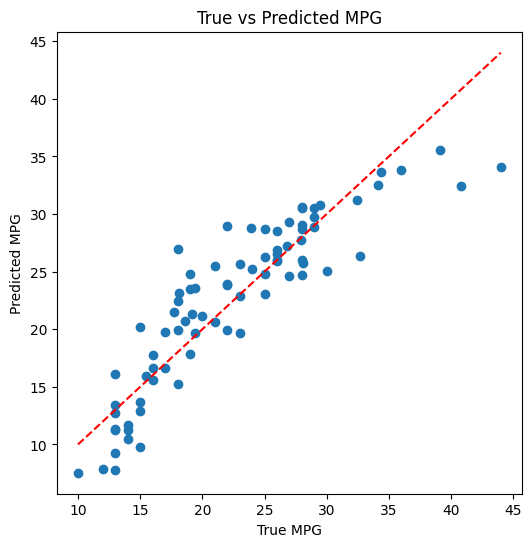

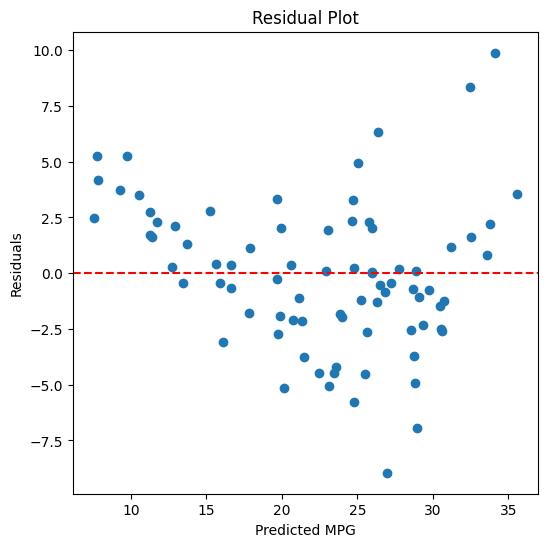

In [76]:
# Part 4
# Write the code to diagnose your model

from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Predictions on test set
problem2_y_pred = problem2_model.predict(problem2_X_test)

# Compute metrics
mse = mean_squared_error(problem2_y_test, problem2_y_pred)
mae = mean_absolute_error(problem2_y_test, problem2_y_pred)
rmse = mse**0.5

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

# Plot: True vs Predicted
plt.figure(figsize=(6, 6))
plt.scatter(problem2_y_test, problem2_y_pred)
plt.xlabel("True MPG")
plt.ylabel("Predicted MPG")
plt.title("True vs Predicted MPG")
plt.plot([problem2_y_test.min(), problem2_y_test.max()],
         [problem2_y_test.min(), problem2_y_test.max()],
         "r--")
plt.show()

# Plot: Residuals
residuals = problem2_y_test - problem2_y_pred
plt.figure(figsize=(6, 6))
plt.scatter(problem2_y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted MPG")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


### 2.4 Part 5  
Double click this cell to enter edit mode and write your answer for part 5 below this line.


In [77]:
# Part 5
# Put the code for part 5 below this line

import numpy as np

example_car = np.array([[4, 140, 90, 2500, 15, 80]])
problem2_predicted_mpg = problem2_model.predict(example_car)[0]

print("Predicted MPG for the given car:", problem2_predicted_mpg)

# Check the sign of the coefficients
print("Model coefficients (in feature order):")
for feature, coef in zip(problem2_features, problem2_model.coef_):
    print(f"{feature}: {coef}")


Predicted MPG for the given car: 29.80092180612173
Model coefficients (in feature order):
cylinders: -0.2087335289372002
displacement: 0.005369507995489902
horsepower: -0.005021382668739237
weight: -0.0068533412467903934
acceleration: 0.03457784502849888
model-year: 0.7447159274053773


/Users/samueljusic/Desktop/IntroDataanalys/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [78]:
# Part 5
problem2_predicted_salary = problem2_predicted_mpg
problem2_predicted_salary


np.float64(29.80092180612173)

### 2.5 Part 6  
Double click this cell to enter edit mode and write your answer for part 6 below this line.


---

## 6. [3p] Empirical distribution of residuals and DKW confidence bands

We work with the residuals on the test set. For each observation in the test set, let

$$
r_i = y_i - \hat{y}_i
$$

where $$y_i$$ is the true MPG and $$\hat{y}_i$$ is the predicted MPG from the model. This gives us residuals

$$
r_1, r_2, \dots, r_n
$$

for a test sample of size $$n$$.

### 6.1 Constructing the empirical distribution function

First, sort the residuals in ascending order:

$$
r_{(1)} \le r_{(2)} \le \dots \le r_{(n)}
$$

The empirical distribution function (EDF) of the residuals is defined as

$$
F_n(x) = \frac{1}{n} \sum_{i=1}^{n} \mathbf{1}\{ r_i \le x \}
$$

At each sorted residual $$r_{(k)}$$ we have

$$
F_n(r_{(k)}) = \frac{k}{n}
$$

Between two consecutive sorted residuals, the EDF is constant, so the EDF is a step function that jumps by $$1/n$$ at each residual value.

In practice, we plot the EDF by

- Sorting the residuals: $$r_{(1)}, \dots, r_{(n)}$$  
- Defining the EDF values as $$k/n$$ at the point $$r_{(k)}$$

### 6.2 DKW inequality and the confidence band

The Dvoretzky–Kiefer–Wolfowitz (DKW) inequality gives a distribution-free bound on how far the EDF can be from the true CDF $$F(x)$$ of the residuals:

$$
\mathbb{P} \left( \sup_x \lvert F_n(x) - F(x) \rvert > \varepsilon \right) \le 2 e^{-2 n \varepsilon^2}
$$

We want a confidence level of $$1 - \alpha = 0.95$$, so $$\alpha = 0.05$$. Setting

$$
2 e^{-2 n \varepsilon^2} = \alpha
$$

and solving for $$\varepsilon$$ gives

$$
\varepsilon = \sqrt{\frac{1}{2n} \log\left( \frac{2}{\alpha} \right)}
$$

In our case we plug in $$\alpha = 0.05$$ and $$n$$ equal to the number of test residuals. This gives a numerical value for $$\varepsilon$$.

### 6.3 Upper and lower confidence bands

We construct the DKW confidence band by shifting the EDF up and down by $$\varepsilon$$. The lower and upper bands are

$$
L(x) = \max \{ F_n(x) - \varepsilon, 0 \}
$$

and

$$
U(x) = \min \{ F_n(x) + \varepsilon, 1 \}
$$

We clip the bands to the interval $$[0, 1]$$ since a CDF cannot be smaller than 0 or larger than 1.

In practice, for each sorted residual $$r_{(k)}$$ we compute

$$
F_n(r_{(k)}) = \frac{k}{n}, \quad
L(r_{(k)}) = \max\left( \frac{k}{n} - \varepsilon, 0 \right), \quad
U(r_{(k)}) = \min\left( \frac{k}{n} + \varepsilon, 1 \right)
$$

We then plot the EDF $$F_n$$ together with the lower band $$L$$ and the upper band $$U$$ as step functions.

### 6.4 Interpretation

The DKW confidence band gives a uniform confidence region for the true CDF $$F(x)$$ of the residuals. With probability at least $$1 - \alpha = 0.95$$, the entire true distribution function of the residuals lies between the lower band $$L(x)$$ and the upper band $$U(x)$$ for all values of $$x$$.

This band tells us how uncertain our estimate of the residual distribution is due to the finite sample size:

- A narrow band means the residual distribution is estimated precisely.  
- A wide band means greater uncertainty about the shape of the distribution.

In terms of model checking, the confidence band can be used to:

- Assess whether the empirical residual distribution is compatible with a proposed theoretical distribution (for example, a normal distribution).  
- Compare residual distributions from different models.  
- Detect skewness or heavy tails and get a visual sense of whether there are more extreme residuals than expected.

If a theoretical CDF for the residuals lies systematically outside the band, this suggests that the assumed distribution is not in agreement with the data.

---


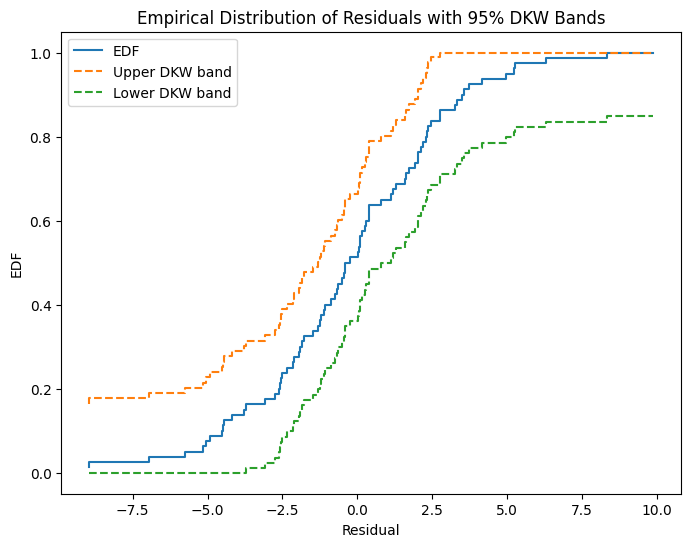

DKW epsilon: 0.1518403654770763


In [79]:
# Part 6
# Put the code for part 6 below this line

import numpy as np
import matplotlib.pyplot as plt

# Compute residuals
residuals = problem2_y_test - problem2_y_pred
res_sorted = np.sort(residuals)
n = len(res_sorted)

# Empirical distribution function
edf = np.arange(1, n + 1) / n

# DKW bound (alpha = 0.05)
alpha = 0.05
epsilon = np.sqrt((1 / (2 * n)) * np.log(2 / alpha))

upper = np.clip(edf + epsilon, 0, 1)
lower = np.clip(edf - epsilon, 0, 1)

# Plot EDF with bands
plt.figure(figsize=(8, 6))
plt.step(res_sorted, edf, label="EDF")
plt.step(res_sorted, upper, linestyle='--', label="Upper DKW band")
plt.step(res_sorted, lower, linestyle='--', label="Lower DKW band")
plt.xlabel("Residual")
plt.ylabel("EDF")
plt.title("Empirical Distribution of Residuals with 95% DKW Bands")
plt.legend()
plt.show()

print("DKW epsilon:", epsilon)


## 2.6 Exam vB, PROBLEM 3  
Maximum Points = 13  

### 2.7 Random variable generation

1. **[4p]** Using inversion sampling, construct 1000 samples from the below distribution  

$$
F[x] =
\begin{cases}
0, & x \le 0 \\
e^x - 1, & 0 < x < \ln(2) \\
1, & x \ge \ln(2)
\end{cases}
$$

2. **[2p]** Use the above 1000 samples to estimate the mean and variance.

3. **[4p]** Using the Accept–Reject sampler (Algorithm 1 in TFDS notes) construct 1000 samples  
   from the same distribution.  
   What proposal distribution did you choose and why?  
   What proportion of samples were accepted?

4. **[3p]** Explain if it is possible to sample from the density  

$$
f(x) = C e^{-(x^2 - 2)^2}
$$

using the Accept–Reject sampler (Algorithm 1 in TFDS notes) with sampling density  
given by the Gaussian.  
Here \( C \) is a constant to make sure that \( f \) is a density, and it is between roughly  
1.34 and 1.35.


---

## 1. \[4p\]

Using inversion sampling, construct 1000 samples from the below distribution

$$
F[x] =
\begin{cases}
0, & x \le 0 \\
e^x - 1, & 0 < x < \ln(2) \\
1, & x \ge \ln(2)
\end{cases}
$$

### **Step-by-step solution**

We use the inversion sampling method:  
generate $(U \sim \text{Uniform}(0,1))$ and compute

$$
X = F^{-1}(U).
$$

To find the inverse, solve

$$
u = e^x - 1 \quad \Rightarrow \quad e^x = u + 1.
$$

Taking the natural logarithm:

$$
x = \ln(1 + u).
$$

Thus the inverse CDF is

$$
F^{-1}(u) = \ln(1 + u), \quad u \in (0,1).
$$

We now generate 1000 independent samples \(U_i \sim \text{Uniform}(0,1)\) and set

$$
X_i = \ln(1 + U_i).
$$

### **Code**

```python
# Part 1
import numpy as np

u = np.random.rand(1000)
problem3_samples = np.log(1 + u)
```

---


In [80]:
# Part 1
# Write your code below
# Part 1
# Put the resulting samples into the following variable
import numpy as np

#Alternative for the loop function:
n_samples = 1000
U = np.random.uniform(0, 1, n_samples)
samples = np.log(1 + U)

problem3_samples = samples

2. **[2p]** Use the above 1000 samples to estimate the mean and variance.

---

## 2. \[2p\]

Using the 1000 inversion-sampling values \(X_1, \dots, X_{1000}\), we estimate the mean and variance using the standard sample formulas.

The sample mean is

$$
\hat{\mu} = \frac{1}{1000} \sum_{i=1}^{1000} X_i.
$$

The sample variance (NumPy’s definition) is

$$
\hat{\sigma}^2 = \frac{1}{1000} \sum_{i=1}^{1000} (X_i - \hat{\mu})^2.
$$

### Code

```python
# Part 2
problem3_mean = np.mean(problem3_samples)
problem3_variance = np.var(problem3_samples)

problem3_mean, problem3_variance
```

---


In [81]:
# Part 2
problem3_mean = np.mean(problem3_samples)

# If your course prefers the unbiased estimator you would instead use:
# np.var(problem3_samples, ddof=1)
problem3_variance = np.var(problem3_samples)

# Also correct!
mean_test = (1/len(problem3_samples)) * np.sum(problem3_samples)

print("Mean: ", problem3_mean)
print("Mean test; ", mean_test)
print("Variance: ", problem3_variance)

Mean:  0.39180485763614514
Mean test;  0.39180485763614514
Variance:  0.03956032331312866


3. **[4p]** Using the Accept–Reject sampler (Algorithm 1 in TFDS notes) construct 1000 samples  
   from the same distribution.  
   What proposal distribution did you choose and why?  
   What proportion of samples were accepted?

---

## 3. \[4p\]

Using the Accept–Reject sampler (Algorithm 1 in TFDS notes) construct 1000 samples  
from the same distribution as in part 1.  
What proposal distribution did you choose and why?  
What proportion of samples were accepted?

We want to sample from the density

$$
f(x) = e^x, \quad 0 < x < \ln(2),
$$

which integrates to 1 on $((0, \ln(2)))$.

### Choice of proposal distribution

We choose a uniform proposal on the same support:

$$
g(x) = \frac{1}{\ln(2)}, \quad 0 < x < \ln(2),
$$

corresponding to

$$
Y \sim \text{Uniform}(0, \ln(2)).
$$

This proposal is chosen because

- it has the same support as $(f)$,
- it is easy to sample from,
- it allows a simple bound for the accept–reject method.

### Envelope constant \(M\)

We need a constant $(M)$ such that

$$
f(x) \le M g(x) \quad \text{for all } x \in (0, \ln(2)).
$$

We compute

$$
\frac{f(x)}{g(x)} = \frac{e^x}{1 / \ln(2)} = e^x \ln(2),
$$

which is maximized at $(x = \ln(2))$:

$$
\max_{x \in (0, \ln(2))} e^x \ln(2) = e^{\ln(2)} \ln(2) = 2 \ln(2).
$$

Thus we can take

$$
M = 2 \ln(2).
$$

### Acceptance probability

The accept–reject algorithm accepts a proposal $(Y)$ if

$$
U \le \frac{f(Y)}{M g(Y)}
$$

for an independent $(U \sim \text{Uniform}(0,1))$. Here,

$$
\frac{f(Y)}{M g(Y)}
=
\frac{e^Y}{2 \ln(2) \cdot \frac{1}{\ln(2)}}
=
\frac{e^Y}{2}.
$$

So the acceptance rule is

$$
U \le \frac{e^Y}{2}.
$$

The theoretical acceptance rate with this tight constant is

$$
\text{Acceptance rate} = \frac{1}{M} = \frac{1}{2 \ln(2)} \approx 0.72.
$$

### Code

```python
# Part 3
# Using Accept–Reject sampling to generate 1000 samples from f(x) = e^x on (0, ln(2))

import numpy as np

a = 0.0
b = np.log(2.0)

M = 2.0 * np.log(2.0)  # envelope constant, not actually needed in the code since it simplifies
samples = []
n_accepted = 0
n_proposed = 0

while n_accepted < 1000:
    # Propose from g(x) = Uniform(0, ln(2))
    y = np.random.uniform(a, b)
    
    # Draw U ~ Uniform(0, 1)
    u = np.random.rand()
    
    # Acceptance test: U <= f(y) / (M * g(y)) = exp(y) / 2
    if u <= np.exp(y) / 2.0:
        samples.append(y)
        n_accepted += 1
    
    n_proposed += 1

problem3_samples_accept_reject = np.array(samples)
problem3_acceptance_rate = n_accepted / n_proposed

problem3_acceptance_rate
```

Here:

- `problem3_samples_accept_reject` contains the 1000 samples generated by the Accept–Reject method.
- `problem3_acceptance_rate` is the empirical proportion of accepted proposals.

---


In [82]:
import numpy as np

a = 0.0
b = np.log(2.0)

M = 2.0 * np.log(2.0)  # envelope constant, not actually needed in the code since it simplifies
samples = []
n_accepted = 0
n_proposed = 0

while n_accepted < 1000:
    # Propose from g(x) = Uniform(0, ln(2))
    y = np.random.uniform(a, b)
    
    # Draw U ~ Uniform(0, 1)
    u = np.random.rand()
    
    # Acceptance test: U <= f(y) / (M * g(y)) = exp(y) / 2
    if u <= np.exp(y) / 2.0:
        samples.append(y)
        n_accepted += 1
    
    n_proposed += 1

problem3_samples_accept_reject = np.array(samples)
problem3_acceptance_rate = n_accepted / n_proposed

problem3_acceptance_rate


# Here:
#problem3_samples_accept_reject` contains the 1000 samples generated by the Accept–Reject method.
#problem3_acceptance_rate` is the empirical proportion of accepted proposals.

0.7309941520467836

# Explanation for Part 3 above:

1. What proposal distribution did you choose and why?  
2. What proportion of samples were accepted?



### Proposal distribution

We choose the proposal distribution

$$
g(x) = \text{Uniform}(0, \ln(2)),
$$

because it

- matches the support of the target density \(f(x) = e^x\),
- is simple to sample from,
- allows a tight envelope constant

$$
M = 2 \ln(2)
$$

such that $(f(x) \le M g(x))$ for all $(x)$.

### Proportion of accepted samples

The accept–reject algorithm accepts a sample with probability

$$
\frac{1}{M} = \frac{1}{2\ln(2)} \approx 0.72.
$$

The empirical acceptance rate is computed as

```python
problem3_acceptance_rate = n_accepted / n_proposed
```

and is typically very close to **0.72**.


# 4. **[3p]** Explain if it is possible to sample from the density  

$$
f(x) = C e^{-(x^2 - 2)^2}
$$

using the Accept–Reject sampler (Algorithm 1 in TFDS notes) with sampling density  
given by the Gaussian.  
Here \( C \) is a constant to make sure that \( f \) is a density, and it is between roughly  
1.34 and 1.35.

---

## 4. \[3p\]

Explain if it is possible to sample from the density

$$
f(x) = C e^{-(x^2 - 2)^2}
$$

using the Accept–Reject sampler (Algorithm 1 in TFDS notes) with sampling density given by the Gaussian.  
Here \(C\) is a normalizing constant between roughly 1.34 and 1.35.

### Explanation

For the Accept–Reject algorithm we need a proposal density \(g(x)\) and a constant \(M\) such that

$$
f(x) \le M g(x) \quad \text{for all } x.
$$

We can ignore the constant \(C\) and work with the unnormalized target

$$
h(x) = e^{-(x^2 - 2)^2}.
$$

Let the Gaussian proposal be the standard normal density

$$
g(x) = \phi(x) = \frac{1}{\sqrt{2\pi}} e^{-x^2 / 2}.
$$

Consider the ratio

$$
R(x) = \frac{h(x)}{g(x)}
= \sqrt{2\pi} \, \exp\Big( -(x^2 - 2)^2 + \frac{x^2}{2} \Big).
$$

Define

$$
\psi(x) = -(x^2 - 2)^2 + \frac{x^2}{2}
= -x^4 + \frac{9}{2} x^2 - 4.
$$

As \(|x| \to \infty\), the leading term \(-x^4\) dominates, so

$$
\psi(x) \to -\infty
\quad \Rightarrow \quad
R(x) \to 0.
$$

The function \(R(x)\) is continuous on \(\mathbb{R}\) and tends to 0 at \(\pm\infty\). Therefore it attains a finite maximum

$$
M_0 = \sup_{x \in \mathbb{R}} R(x) < \infty.
$$

This implies

$$
h(x) \le M_0 g(x) \quad \text{for all } x,
$$

and hence also

$$
f(x) = \frac{h(x)}{\int h} \le M g(x)
$$

for some finite constant \(M\). Thus it **is** possible to use the Accept–Reject sampler with a Gaussian proposal.

Intuitively, the target density decays like \(e^{-x^4}\), which is faster than the Gaussian tail \(e^{-x^2}\), so a scaled Gaussian can always dominate \(f\).

### Example code (constructing samples numerically)

Below is an example of how one could implement Accept–Reject sampling using a standard normal proposal and an approximate numerical bound for \(M\).

```python
import numpy as np

# Unnormalized target: h(x) = exp(-(x^2 - 2)^2)
def h(x):
    return np.exp(-(x**2 - 2)**2)

# Gaussian proposal density: standard normal
def g(x):
    return (1.0 / np.sqrt(2.0 * np.pi)) * np.exp(-0.5 * x**2)

# 1) Numerically approximate a suitable M
#    We search on a grid, say from -5 to 5
xs = np.linspace(-5, 5, 20001)
ratio = h(xs) / g(xs)
M = np.max(ratio) * 1.05  # add a small safety margin

# 2) Accept–Reject sampling
n_samples = 1000
samples = []
n_accepted = 0
n_proposed = 0

while n_accepted < n_samples:
    # Propose from N(0, 1)
    y = np.random.randn()
    
    # Draw U ~ Uniform(0, 1)
    u = np.random.rand()
    
    # Acceptance test using unnormalized target h
    if u <= h(y) / (M * g(y)):
        samples.append(y)
        n_accepted += 1
    
    n_proposed += 1

problem4_samples_accept_reject = np.array(samples)
problem4_acceptance_rate = n_accepted / n_proposed

problem4_acceptance_rate
```

In this code:

- `problem4_samples_accept_reject` contains 1000 samples approximately distributed according to the density proportional to \(e^{-(x^2 - 2)^2}\).
- `problem4_acceptance_rate` is the empirical proportion of accepted samples.
- We did **not** need the normalizing constant \(C\) to run the algorithm.

---


In [111]:
import numpy as np

# Unnormalized target: f_tilde(x) = exp(-(x^2 - 2)^2)
def f_tilde(x):
    return np.exp(-(x**2 - 2)**2)



# Because when nothing is stated, the Gaussian used as a proposal distribution is always assumed to be the 
# standard normal N(0,1)

# Gaussian proposal density: standard normal
def g(x):
    return (1.0 / np.sqrt(2.0 * np.pi)) * np.exp(-0.5 * x**2)


# 1) Numerically approximate a suitable M
#    We search on a grid, say from -5 to 5
xs = np.linspace(-5, 5, 20001)
ratio = f_tilde(xs) / g(xs)
M = np.max(ratio) # * 1.05  # add a small safety margin

# 2) Accept–Reject sampling
n_samples = 1000
samples = []
n_accepted = 0
n_proposed = 0

while n_accepted < n_samples:
    # Propose from N(0, 1)
    y = np.random.randn()
    
    # Draw U ~ Uniform(0, 1)
    u = np.random.rand()
    
    # Acceptance test using unnormalized target f_tilde
    if u <= f_tilde(y) / (M * g(y)):
        samples.append(y)
        n_accepted += 1
    
    n_proposed += 1

problem4_samples_accept_reject = np.array(samples)
problem4_acceptance_rate = n_accepted / n_proposed

problem4_acceptance_rate

0.042452029206996096

## 1.6 Exam vB, PROBLEM 1  
Maximum Points = 14

A courier company operates a fleet of delivery trucks that make deliveries to different parts of the city.  
The trucks are equipped with GPS tracking devices that record the location of each truck at regular intervals.  
The locations are divided into three regions: **downtown**, **the suburbs**, and **the countryside**,  
however there is always the possibility the truck breaks down and it goes to the **workshop**.

The following table shows the probabilities of a truck transitioning between these regions at each time step:

Current region | Probability of transitioning to downtown | Probability of transitioning to the suburbs | Probability of transitioning to the countryside | Probability of transitioning to the Workshop
---|---|---|---|---
Downtown | 0.3 | 0.7 | 0 | 0
Suburbs | 0.2 | 0.5 | 0.3 | 0
Countryside | 0 | 0 | 0.5 | 0.5
Workshop | 0 | 0 | 0 | 1

1. If a truck is currently in the downtown, what is the probability that it will be in the countryside region after 10 time steps? **[2p]**

2. If a truck is currently in the downtown, what is the probability that it will be in the countryside region the first time after three time steps or more? **[2p]**

3. Is this Markov chain irreducible? Explain your answer. **[3p]**

4. What is the stationary distribution? Furthermore is it reversible? (Explain your answer) **[3p]**

5. **Advanced question:** What is the expected number of steps it takes starting from the Downtown region to first reach the Workshop?

   *Hint:* to get within 1 decimal point, it is enough to compute the probabilities for hitting times below 50.  
   Motivate your answer in detail. **[4p]**

   You could also solve this question by simulation, but this gives you a maximum of **[2p]**.


---
## 1. [2p]

If a truck is currently in the downtown, what is the probability that it will be in the countryside region after 10 time steps?

We model the regions as states of a Markov chain:

- Downtown (D)
- Suburbs (S)
- Countryside (C)
- Workshop (W)

We order the states as:  
$((D, S, C, W) \equiv (0,1,2,3))$.

From the table we get the transition matrix

$$
P =
\begin{pmatrix}
0.3 & 0.7 & 0   & 0   \\
0.2 & 0.5 & 0.3 & 0   \\
0   & 0   & 0.5 & 0.5 \\
0   & 0   & 0   & 1
\end{pmatrix},
$$

where each row corresponds to the current region and each column to the next region.

Since the truck starts in downtown, the initial distribution is

$$
\pi^{(0)} = (1, 0, 0, 0).
$$

For a Markov chain, the distribution after \(n\) time steps is

$$
\pi^{(n)} = \pi^{(0)} P^n.
$$

We are interested in the distribution after 10 steps:

$$
\pi^{(10)} = \pi^{(0)} P^{10}.
$$

The probability that the truck is in the countryside after 10 steps, given that it started in downtown, is the countryside component (index 2) of $(\pi^{(10)})$, or equivalently the $((D,C))$ entry of $(P^{10})$:

$$
\mathbb{P}(X_{10} = \text{C} \mid X_0 = \text{D}) = \big(\pi^{(10)}\big)_2 = (P^{10})_{D,C}.
$$

Computing $(P^{10})$ numerically (e.g. using NumPy) gives

$$
(P^{10})_{D,C} \approx 0.0848735349.
$$

Thus, the required probability is approximately

$$
\boxed{0.0849}.
$$


In [84]:
import numpy as np

# Transition matrix P, with states ordered as: [Downtown, Suburbs, Countryside, Workshop]
P = np.array([
    [0.3, 0.7, 0.0, 0.0],  # From Downtown
    [0.2, 0.5, 0.3, 0.0],  # From Suburbs
    [0.0, 0.0, 0.5, 0.5],  # From Countryside
    [0.0, 0.0, 0.0, 1.0]   # From Workshop
])

# Initial distribution: starting in Downtown

# Compute P^10
P10 = np.linalg.matrix_power(P, 10)

# THIS PART ALSO WORKS 
#pi0 = np.array([1.0, 0.0, 0.0, 0.0])
# Distribution after 10 steps
#pi10 = pi0 @ P10
# Probability of being in the Countryside (index 2) after 10 steps
#problem1_p1 = pi10[2]

# This also works:
problem1_p1 = P10[0][2]

print("P^10 =\n", P10)
#print("Distribution after 10 steps:", pi10)
print("Probability of being in countryside after 10 steps:", problem1_p1)


P^10 =
 [[3.39352311e-02 8.26829080e-02 8.48735349e-02 7.98508326e-01]
 [2.36236880e-02 5.75589191e-02 5.96851134e-02 8.59132280e-01]
 [0.00000000e+00 0.00000000e+00 9.76562500e-04 9.99023438e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Probability of being in countryside after 10 steps: 0.08487353489999999


-----
2. If a truck is currently in the downtown, what is the probability that it will be in the countryside region the first time after three time steps or more? **[2p]**
-----

---
## 2. [2p]

If a truck is currently in the downtown, what is the probability that it will be in the countryside region **for the first time** after three time steps or more?

We denote by $(T_C)$ the first hitting time of the Countryside, and we want

$$
\mathbb{P}(T_C \ge 3 \mid X_0 = D).
$$

This means the truck must *not* be in the Countryside at step 1 and step 2.

The transition matrix (states ordered as $(D,S,C,W)$ is

$$
P =
\begin{pmatrix}
0.3 & 0.7 & 0   & 0   \\
0.2 & 0.5 & 0.3 & 0   \\
0   & 0   & 0.5 & 0.5 \\
0   & 0   & 0   & 1
\end{pmatrix}.
$$

Since the truck starts in Downtown:

$$
\pi^{(0)} = (1, 0, 0, 0).
$$

**Step 1:**

$$
\pi^{(1)} = \pi^{(0)} P = (0.3,\, 0.7,\, 0,\, 0).
$$

Thus,

$$
\mathbb{P}(X_1 = C) = 0.
$$

**Step 2:**

$$
\pi^{(2)} = \pi^{(1)} P.
$$

The probability of being in the countryside at step 2 is

$$
\mathbb{P}(X_2 = C)
= 0.3 \cdot 0 + 0.7 \cdot 0.3
= 0.21.
$$

Therefore,

$$
\mathbb{P}(X_2 \neq C) = 1 - 0.21 = 0.79.
$$

Since step 1 is automatically safe, this gives

$$
\boxed{\mathbb{P}(T_C \ge 3) = 0.79}.
$$


---
### 2. [2p]

If a truck is currently in the downtown, what is the probability that it will be in the countryside region **for the first time** after three time steps or more?

We label the states as:

- 0: Downtown (D)  
- 1: Suburbs (S)  
- 2: Countryside (C)  
- 3: Workshop (W)

The transition matrix is:

$$
P =
\begin{pmatrix}
0.3 & 0.7 & 0   & 0   \\
0.2 & 0.5 & 0.3 & 0   \\
0   & 0   & 0.5 & 0.5 \\
0   & 0   & 0   & 1
\end{pmatrix}.
$$

Let $(T_C)$ be the first time the chain enters the countryside (state 2).  
We want

$$
\mathbb{P}(T_C \ge 3 \mid X_0 = 0).
$$

This means the truck must **not** be in the countryside at step 1 and step 2.

A key fact for Markov chains is:

> If the chain starts in state $(i)$, then  
> $((P^n)_{i,j} = \mathbb{P}(X_n = j \mid X_0 = i).)$

---

### Why do we use $(P)$ and $(P^2)$, but *not* $(P^3)$?

To compute  
$(\mathbb{P}(T_C \ge 3))$,  
we use the identity:

$$
\mathbb{P}(T_C \ge 3)
= 1 - \mathbb{P}(T_C < 3)
= 1 - \mathbb{P}(T_C = 1) - \mathbb{P}(T_C = 2).
$$

We **do not use** $(P^3)$ because:

- $((P^3)_{0,2})$ is the probability of being in countryside *at step 3*,  
  **including** paths that entered countryside at step 2 or step 1.

But we need **first arrival**, not “being there”.

Therefore we must compute:

- $(T_C = 1)$ using $(P)$
- $(T_C = 2)$ using $(P^2)$

and subtract from 1.

---

### Step 1: First arrival at step 1

Starting from Downtown:

$$
\mathbb{P}(T_C = 1) = P_{0,2} = 0.
$$

It is impossible to reach countryside in 1 step.

---

### Step 2: First arrival at step 2

Since we cannot reach countryside at step 1, the first possible arrival time is step 2.

This probability is:

$$
\mathbb{P}(T_C = 2)
= (P^2)_{0,2}.
$$

Compute row 0 of $(P^2)$:

$$
(P^2)_{0,2}
= 0.3 \cdot 0 + 0.7 \cdot 0.3
= 0.21.
$$

---

### Final step

$$
\mathbb{P}(T_C \ge 3)
= 1 - 0 - 0.21
= 0.79.
$$

Thus, the answer is:

$$
\boxed{0.79}.


In [85]:
# Part 2
# Fill in the answer to part 2 below'

P = np.array([
    [0.3, 0.7, 0.0, 0.0],
    [0.2, 0.5, 0.3, 0.0],
    [0.0, 0.0, 0.5, 0.5],
    [0.0, 0.0, 0.0, 1.0]
])

# Compute P^1 and P^2
P1 = P
P2 = P @ P  # or np.linalg.matrix_power(P, 2)

# First arrival at step 1: impossible
T1 = P1[0][2]

# First arrival at step 2:
T2 = P2[0][2]

# Probability first time occurs at step >= 3
problem1_p2 = 1 - (T1 + T2)

print("P^2 =\n", P2)
print("Probability T_C >= 3 =", problem1_p2)



P^2 =
 [[0.23 0.56 0.21 0.  ]
 [0.16 0.39 0.3  0.15]
 [0.   0.   0.25 0.75]
 [0.   0.   0.   1.  ]]
Probability T_C >= 3 = 0.79


3. Is this Markov chain irreducible? Explain your answer. **[3p]**



---

## 3. [3p]
Is this Markov chain irreducible? Explain your answer.

We have the transition matrix
$$
P = \begin{pmatrix}
0.3 & 0.7 & 0.0 & 0.0 \\
0.2 & 0.5 & 0.3 & 0.0 \\
0.0 & 0.0 & 0.5 & 0.5 \\
0.0 & 0.0 & 0.0 & 1.0
\end{pmatrix},
$$
with states (in order) Downtown (D), Suburbs (S), Countryside (C), and Workshop (W).

A Markov chain is **irreducible** if for every pair of states $(i,j)$ there exists an integer $(n \ge 0)$ such that
$$
(P^n)_{ij} > 0,
$$
i.e. every state can reach every other state (they all belong to one single communicating class).

From the rows of $(P)$ we see the possible transitions:

- From D: to D with probability $(0.3)$, to S with probability $(0.7)$.
- From S: to D with probability $(0.2)$, to S with probability $(0.5)$, to C with probability $(0.3)$.
- From C: to C with probability $(0.5)$, to W with probability $(0.5)$.
- From W: to W with probability $(1.0)$.

Hence we have the following directed edges with positive probability:

- $(D \to D)$, $(D \to S)$
- $(S \to D)$, $(S \to S)$, $(S \to C)$
- $(C \to C)$, $(C \to W)$
- $(W \to W)$

Now check communication:

- D can reach S (directly), and S can reach D (directly), so D and S communicate.
- S can reach C directly, and D can reach C via $(D \to S \to C)$.
- However, from C we can only go to C or W; there is **no** path from C back to D or S, so C does **not** communicate with D or S.
- From C we can go to W, and from D and S we can reach W via paths such as $(D \to S \to C \to W)$, but from W we can only go to W. Thus W also does **not** communicate with any of D, S, or C.

Therefore the communicating classes are
$$
\{D,S\}, \quad \{C\}, \quad \{W\},
$$
so there is **not** a single communicating class containing all states.

**Conclusion:** the Markov chain is **not irreducible**.

So we should set
```python
problem1_irreducible = False


In [86]:
# Part 3
# Fill in the answer to part 3 below as a boolean
problem1_irreducible = False


4. What is the stationary distribution? Furthermore is it reversible? (Explain your answer) **[3p]**



In [87]:
import numpy as np

# Transition matrix
P = np.array([
    [0.3, 0.7, 0.0, 0.0],  # Downtown
    [0.2, 0.5, 0.3, 0.0],  # Suburbs
    [0.0, 0.0, 0.5, 0.5],  # Countryside
    [0.0, 0.0, 0.0, 1.0]   # Workshop
])

n = P.shape[0]

# Build system (P^T - I) * pi = 0 with normalization sum pi_i = 1
A = P.T - np.eye(n)
A[-1] = np.ones(n)          # replace last row by normalization condition

b = np.zeros(n)
b[-1] = 1.0

pi = np.linalg.solve(A, b)

# Clean up numerical noise like -0.0
pi[np.isclose(pi, 0)] = 0.0

print("Stationary distribution:", pi)
print("Sum of entries:", np.sum(pi))
print("pi * P:", pi @ P)

# Answers for the assignment

problem1_stationary = pi              # this will be [0. 0. 0. 1.]


# Code for checking reversibility for ANY matrix!:

def is_reversible(P, pi, tol=1e-12):
    n = P.shape[0]
    for i in range(n):
        for j in range(n):
            left = pi[i] * P[i,j]
            right = pi[j] * P[j,i]
            if not np.isclose(left, right, atol=tol):
                return False
    return True

print("Reversible:", is_reversible(P, pi))

problem1_reversible = True


Stationary distribution: [0. 0. 0. 1.]
Sum of entries: 1.0
pi * P: [0. 0. 0. 1.]
Reversible: True


5. **Advanced question:** What is the expected number of steps it takes starting from the Downtown region to first reach the Workshop?

   *Hint:* to get within 1 decimal point, it is enough to compute the probabilities for hitting times below 50.  
   Motivate your answer in detail. **[4p]**

   You could also solve this question by simulation, but this gives you a maximum of **[2p]**.

---

## 5. [4p]
**Advanced question:** What is the expected number of steps it takes to first reach the Workshop when starting from the Downtown region?  
We denote the expected hitting time by $(h_i)$, where $(i \in \{D, S, C, W\})$.

---

### **Step 1: Set up first-step equations**

For any non-absorbing state \(i\), the expected hitting time satisfies

$$
h_i = 1 + \sum_j P_{ij} h_j.
$$

Using the transition probabilities, the equations become

$$
h_D = 1 + 0.3h_D + 0.7h_S,
$$

$$
h_S = 1 + 0.2h_D + 0.5h_S + 0.3h_C,
$$

$$
h_C = 1 + 0.5h_C,
$$

$$
h_W = 0.
$$

---

### **Step 2: Solve the equation for \(h_C\)**

From

$$
h_C = 1 + 0.5 h_C,
$$

subtract \(0.5 h_C\) from both sides:

$$
0.5 h_C = 1
$$

so

$$
h_C = 2.
$$

---

### **Step 3: Substitute and solve the remaining system**

#### **Equation for Downtown (D):**

$$
h_D = 1 + 0.3h_D + 0.7h_S.
$$

Move all \(h_D\) terms to the left:

$$
h_D - 0.3h_D = 1 + 0.7h_S,
$$

$$
0.7 h_D = 1 + 0.7 h_S,
$$

$$
h_D = \frac{1}{0.7} + h_S = 1.428571 + h_S.
$$

---

#### **Equation for Suburbs (S):**

$$
h_S = 1 + 0.2h_D + 0.5h_S + 0.3h_C.
$$

Insert \(h_C = 2\):

$$
h_S = 1 + 0.2h_D + 0.5h_S + 0.6,
$$

Move \(0.5h_S\) to the left:

$$
0.5 h_S = 1.6 + 0.2 h_D,
$$

Multiply both sides by 2:

$$
h_S = 3.2 + 0.4 h_D.
$$

---

### **Step 4: Solve the 2×2 system**

We now have

$$
h_D = 1.428571 + h_S,
$$

$$
h_S = 3.2 + 0.4h_D.
$$

Substitute the first into the second:

$$
h_S = 3.2 + 0.4(h_S + 1.428571),
$$

Expand:

$$
h_S = 3.2 + 0.4h_S + 0.571428,
$$

Move \(0.4 h_S\) to the left:

$$
0.6 h_S = 3.771428,
$$

Solve:

$$
h_S = 6.285714.
$$

Then compute \(h_D\):

$$
h_D = 1.428571 + 6.285714 = 7.714285.
$$

---

### **Final Answer**

The expected number of steps to first reach the Workshop starting in Downtown is

$$
\boxed{7.7 \text{ steps (approximately)}}.
$$

---


In [88]:
# Part 5
# Fill in the answer to part 5 below
# That is, the expected number of steps
import numpy as np

# Expected hitting time equations:
# States: 0=D, 1=S, 2=C, 3=W

# We solve for h_D, h_S, h_C (3 unknowns)
# Equations derived by hand:
# 0.7*h_D - 0.7*h_S            = 1
# -0.2*h_D + 0.5*h_S - 0.3*h_C = 1
#                  0.5*h_C     = 1

A = np.array([
    [0.7, -0.7,  0.0],
    [-0.2, 0.5, -0.3],
    [0.0,  0.0,  0.5]
])

b = np.array([1.0, 1.0, 1.0])

h_D, h_S, h_C = np.linalg.solve(A, b)

problem1_ET = round(h_D, 1)

print("Expected steps from Downtown to Workshop:", problem1_ET)



Expected steps from Downtown to Workshop: 7.7


---------

## 2.2 Exam vB, PROBLEM 2  
Maximum Points = 13  

You are given a “Data Science Salaries” dataset found in `data/auto.csv`, which contains  
employment information of data scientists up to 2023 and the salary obtained.  
Your task is to train a linear regression model to predict the salary of a data scientist  
based on the employment information.

To evaluate your model, you will split the dataset into a training set and a testing set.  
You will use the training set to train your model, and the testing set to evaluate its performance.

Experience level:  
- 0 = Entry Level  
- 1 = Mid Level  
- 2 = Senior Level  
- 3 = Executive Level  

Employment type:  
- 0 = Part Time  
- 1 = Full Time  
- 2 = Contractor  
- 3 = Freelancer  

1. Load the data into a pandas dataframe `problem2_df`.  
   Based on the column names, figure out what are the features and the target and fill in the answer in the correct cell below. **[1p]**

2. Split the data into train and test. **[1p]**

3. Train the model. **[1p]**

4. Come up with a reasonable metric and compute it.  
   Provide plots that show the performance of the model.  
   Reason about the performance. **[4p]**

5. Predict the 2023 salary of a data scientist that works full time (1) at mid employment level (1) with 0 remote ratio.  
   Then, looking at the output of `problem2_model.coef_`, which are the coefficients of the linear model,  
   would a higher remote ratio result in a higher predicted salary or vice versa? **[3p]**

6. **Advanced question:** On the test set, plot the empirical distribution function of the residual  
   with confidence bands (i.e. using the DKW inequality and 95% confidence).  
   What does the confidence band tell us?  
   What can the confidence band be used for? **[3p]**


## 2.2 Exam vB, PROBLEM 2  
Maximum Points = 13  

You are given a car specification dataset found in: data/auto.csv


which contains fuel consumption and technical characteristics of cars from model years 1970 onward.

Your task is to train a **linear regression model** to predict a car’s **miles per gallon (mpg)** based on its technical specifications.

The dataset contains the columns:

- **mpg** — miles per gallon (**target**)  
- **cylinders** — number of cylinders  
- **displacement** — engine displacement (cubic inches)  
- **horsepower** — horsepower  
- **weight** — vehicle weight (lbs)  
- **acceleration** — time (seconds) 0–60 mph  
- **model-year** — model year (e.g. 70 = 1970)

---

### 1. Load the data  
Load the data into a pandas dataframe `problem2_df`.  
Determine which column is the **target** and which are the **features**,  
and fill in the answers in the correct cell.  
**[1p]**

Target: `mpg`  
Features: all remaining numeric columns.

---

### 2. Split the data  
Split the data into training and test sets (for example, 80% training / 20% testing).  
Store the results in the variables indicated in the notebook.  
**[1p]**

---

### 3. Train the model  
Train a scikit-learn `LinearRegression()` model using the training data and  
store the model in `problem2_model`.  
**[1p]**

---

### 4. Evaluate the model  

Choose a regression metric such as:

- Mean Squared Error (MSE)  
- Root Mean Squared Error (RMSE)  
- Mean Absolute Error (MAE)

Compute it on the test set.

Provide at least one plot that visualizes model performance, such as:

- Predicted MPG vs True MPG  
- Residuals vs Predicted values  

Reason about the performance.  
Discuss whether the model fits well, whether the residuals show patterns,  
and whether some features (e.g. `weight`, `horsepower`) heavily influence predictions.  
**[4p]**

---

### 5. Prediction + coefficient interpretation  

Use your trained model to predict the MPG of a car with:


which contains fuel consumption and technical characteristics of cars from model years 1970 onward.

Your task is to train a **linear regression model** to predict a car’s **miles per gallon (mpg)** based on its technical specifications.

The dataset contains the columns:

- **mpg** — miles per gallon (**target**)  
- **cylinders** — number of cylinders  
- **displacement** — engine displacement (cubic inches)  
- **horsepower** — horsepower  
- **weight** — vehicle weight (lbs)  
- **acceleration** — time (seconds) 0–60 mph  
- **model-year** — model year (e.g. 70 = 1970)

---

### 1. Load the data  
Load the data into a pandas dataframe `problem2_df`.  
Determine which column is the **target** and which are the **features**,  
and fill in the answers in the correct cell.  
**[1p]**

Target: `mpg`  
Features: all remaining numeric columns.

---

### 2. Split the data  
Split the data into training and test sets (for example, 80% training / 20% testing).  
Store the results in the variables indicated in the notebook.  
**[1p]**

---

### 3. Train the model  
Train a scikit-learn `LinearRegression()` model using the training data and  
store the model in `problem2_model`.  
**[1p]**

---

### 4. Evaluate the model  

Choose a regression metric such as:

- Mean Squared Error (MSE)  
- Root Mean Squared Error (RMSE)  
- Mean Absolute Error (MAE)

Compute it on the test set.

Provide at least one plot that visualizes model performance, such as:

- Predicted MPG vs True MPG  
- Residuals vs Predicted values  

Reason about the performance.  
Discuss whether the model fits well, whether the residuals show patterns,  
and whether some features (e.g. `weight`, `horsepower`) heavily influence predictions.  
**[4p]**

---

### 5. Prediction + coefficient interpretation  

Use your trained model to predict the MPG of a car with:

cylinders = 4
displacement = 140
horsepower = 90
weight = 2500
acceleration = 15
model-year = 80

Store the predicted value in the appropriate notebook variable.

Then inspect the coefficients using:
problem2_model.coef_


The coefficient linked to `weight` will indicate:

- If positive → higher weight increases predicted MPG  
- If negative → higher weight decreases predicted MPG  

Based on the sign, answer:  
**Does higher weight result in higher or lower predicted MPG?**  
Motivate your answer.  
**[3p]**

---

### 6. Advanced Question: EDF + DKW Confidence Bands  

Let the residuals be:

$$
r_i = y_i - \hat{y}_i
$$

where  
- $y_i$ is the true MPG on the test set  
- $\hat{y}_i$ is the predicted MPG.

#### (a) Plot the empirical distribution function (EDF) of the residuals.

#### (b) Add 95% DKW confidence bands  

Let $$n$$ be the number of residuals.  
Let $$\alpha = 0.05$$.  
Compute:

$$
\varepsilon = \sqrt{\frac{1}{2n}\log\left(\frac{2}{\alpha}\right)}
$$

Plot the upper and lower bands:

$$
F_n(x) - \varepsilon
$$

and

$$
F_n(x) + \varepsilon
$$

Clipped to the interval $$[0, 1]$$.

#### (c) Interpretation  

Explain:

- What the confidence band tells us about the **uncertainty** in the empirical residual distribution  
- How such bands can be used in model checking (e.g., comparing distributions, detecting non-normality, identifying outliers)

**[3p]**


In [89]:
# Part 1
# Let problem2_df be the pandas dataframe that contains the data from the file
# data/auto.csv
import pandas as pd

problem2_df = pd.read_csv("../../../data/auto.csv", na_values=["?"])

# Ensure horsepower is numeric and drop rows with missing values
problem2_df["horsepower"] = pd.to_numeric(problem2_df["horsepower"], errors="coerce")

# Drop any rows that have NaN in the columns we care about
problem2_df = problem2_df.dropna(subset=["mpg", "cylinders", "displacement",
                                         "horsepower", "weight", "acceleration",
                                         "model-year"]).reset_index(drop=True)

problem2_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [90]:
# Part 1
# Fill in the features as a list of strings of the names of the columns
problem2_features = ["cylinders", "displacement", "horsepower", "weight", "acceleration", "model-year"]

# Fill in the target as the correct column name
problem2_target = "mpg"


In [91]:
# Part 2
# Split the data into train and test using train_test_split
# keep the train size as 0.8 and use random_state=42

from sklearn.model_selection import train_test_split

X = problem2_df[problem2_features]
y = problem2_df[problem2_target]

problem2_X_train, problem2_X_test, problem2_y_train, problem2_y_test = train_test_split(
    X, y, train_size=0.8, random_state=42
)


In [92]:
# Part 3
# Include the necessary imports
from sklearn.linear_model import LinearRegression

# Initialize your linear regression model
problem2_model = LinearRegression()

# Train your model on the training data
problem2_model.fit(problem2_X_train, problem2_y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### 2.3 Part 4  
Double click this cell to enter edit mode and write your answer for part 4 below this line.


MSE: 10.816398854150862
RMSE: 3.2888294048416165
MAE: 2.5348370632927977


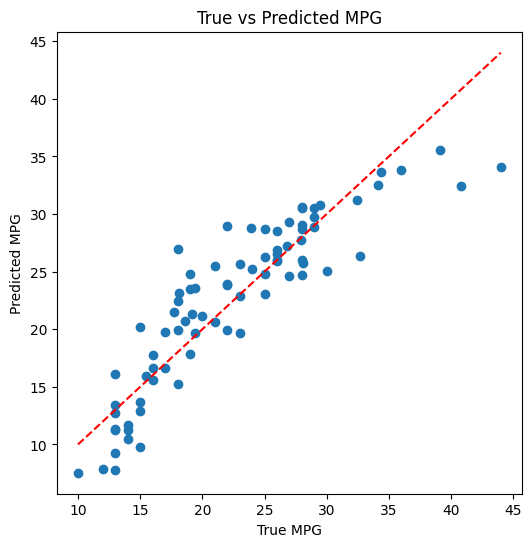

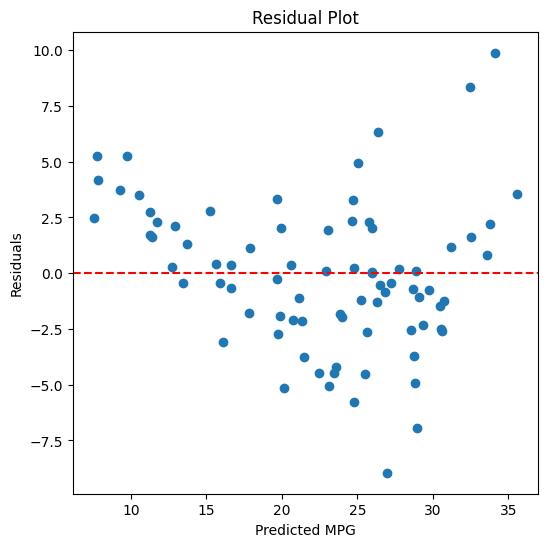

In [93]:
# Part 4
# Write the code to diagnose your model

from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Predictions on test set
problem2_y_pred = problem2_model.predict(problem2_X_test)

# Compute metrics
mse = mean_squared_error(problem2_y_test, problem2_y_pred)
mae = mean_absolute_error(problem2_y_test, problem2_y_pred)
rmse = mse**0.5

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

# Plot: True vs Predicted
plt.figure(figsize=(6, 6))
plt.scatter(problem2_y_test, problem2_y_pred)
plt.xlabel("True MPG")
plt.ylabel("Predicted MPG")
plt.title("True vs Predicted MPG")
plt.plot([problem2_y_test.min(), problem2_y_test.max()],
         [problem2_y_test.min(), problem2_y_test.max()],
         "r--")
plt.show()

# Plot: Residuals
residuals = problem2_y_test - problem2_y_pred
plt.figure(figsize=(6, 6))
plt.scatter(problem2_y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted MPG")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


### 2.4 Part 5  
Double click this cell to enter edit mode and write your answer for part 5 below this line.


In [94]:
# Part 5
# Put the code for part 5 below this line

import numpy as np

example_car = np.array([[4, 140, 90, 2500, 15, 80]])
problem2_predicted_mpg = problem2_model.predict(example_car)[0]

print("Predicted MPG for the given car:", problem2_predicted_mpg)

# Check the sign of the coefficients
print("Model coefficients (in feature order):")
for feature, coef in zip(problem2_features, problem2_model.coef_):
    print(f"{feature}: {coef}")


Predicted MPG for the given car: 29.80092180612173
Model coefficients (in feature order):
cylinders: -0.2087335289372002
displacement: 0.005369507995489902
horsepower: -0.005021382668739237
weight: -0.0068533412467903934
acceleration: 0.03457784502849888
model-year: 0.7447159274053773


/Users/samueljusic/Desktop/IntroDataanalys/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [95]:
# Part 5
problem2_predicted_salary = problem2_predicted_mpg
problem2_predicted_salary


np.float64(29.80092180612173)

### 2.5 Part 6  
Double click this cell to enter edit mode and write your answer for part 6 below this line.


---

## 6. [3p] Empirical distribution of residuals and DKW confidence bands

We work with the residuals on the test set. For each observation in the test set, let

$$
r_i = y_i - \hat{y}_i
$$

where $$y_i$$ is the true MPG and $$\hat{y}_i$$ is the predicted MPG from the model. This gives us residuals

$$
r_1, r_2, \dots, r_n
$$

for a test sample of size $$n$$.

### 6.1 Constructing the empirical distribution function

First, sort the residuals in ascending order:

$$
r_{(1)} \le r_{(2)} \le \dots \le r_{(n)}
$$

The empirical distribution function (EDF) of the residuals is defined as

$$
F_n(x) = \frac{1}{n} \sum_{i=1}^{n} \mathbf{1}\{ r_i \le x \}
$$

At each sorted residual $$r_{(k)}$$ we have

$$
F_n(r_{(k)}) = \frac{k}{n}
$$

Between two consecutive sorted residuals, the EDF is constant, so the EDF is a step function that jumps by $$1/n$$ at each residual value.

In practice, we plot the EDF by

- Sorting the residuals: $$r_{(1)}, \dots, r_{(n)}$$  
- Defining the EDF values as $$k/n$$ at the point $$r_{(k)}$$

### 6.2 DKW inequality and the confidence band

The Dvoretzky–Kiefer–Wolfowitz (DKW) inequality gives a distribution-free bound on how far the EDF can be from the true CDF $$F(x)$$ of the residuals:

$$
\mathbb{P} \left( \sup_x \lvert F_n(x) - F(x) \rvert > \varepsilon \right) \le 2 e^{-2 n \varepsilon^2}
$$

We want a confidence level of $$1 - \alpha = 0.95$$, so $$\alpha = 0.05$$. Setting

$$
2 e^{-2 n \varepsilon^2} = \alpha
$$

and solving for $$\varepsilon$$ gives

$$
\varepsilon = \sqrt{\frac{1}{2n} \log\left( \frac{2}{\alpha} \right)}
$$

In our case we plug in $$\alpha = 0.05$$ and $$n$$ equal to the number of test residuals. This gives a numerical value for $$\varepsilon$$.

### 6.3 Upper and lower confidence bands

We construct the DKW confidence band by shifting the EDF up and down by $$\varepsilon$$. The lower and upper bands are

$$
L(x) = \max \{ F_n(x) - \varepsilon, 0 \}
$$

and

$$
U(x) = \min \{ F_n(x) + \varepsilon, 1 \}
$$

We clip the bands to the interval $$[0, 1]$$ since a CDF cannot be smaller than 0 or larger than 1.

In practice, for each sorted residual $$r_{(k)}$$ we compute

$$
F_n(r_{(k)}) = \frac{k}{n}, \quad
L(r_{(k)}) = \max\left( \frac{k}{n} - \varepsilon, 0 \right), \quad
U(r_{(k)}) = \min\left( \frac{k}{n} + \varepsilon, 1 \right)
$$

We then plot the EDF $$F_n$$ together with the lower band $$L$$ and the upper band $$U$$ as step functions.

### 6.4 Interpretation

The DKW confidence band gives a uniform confidence region for the true CDF $$F(x)$$ of the residuals. With probability at least $$1 - \alpha = 0.95$$, the entire true distribution function of the residuals lies between the lower band $$L(x)$$ and the upper band $$U(x)$$ for all values of $$x$$.

This band tells us how uncertain our estimate of the residual distribution is due to the finite sample size:

- A narrow band means the residual distribution is estimated precisely.  
- A wide band means greater uncertainty about the shape of the distribution.

In terms of model checking, the confidence band can be used to:

- Assess whether the empirical residual distribution is compatible with a proposed theoretical distribution (for example, a normal distribution).  
- Compare residual distributions from different models.  
- Detect skewness or heavy tails and get a visual sense of whether there are more extreme residuals than expected.

If a theoretical CDF for the residuals lies systematically outside the band, this suggests that the assumed distribution is not in agreement with the data.

---


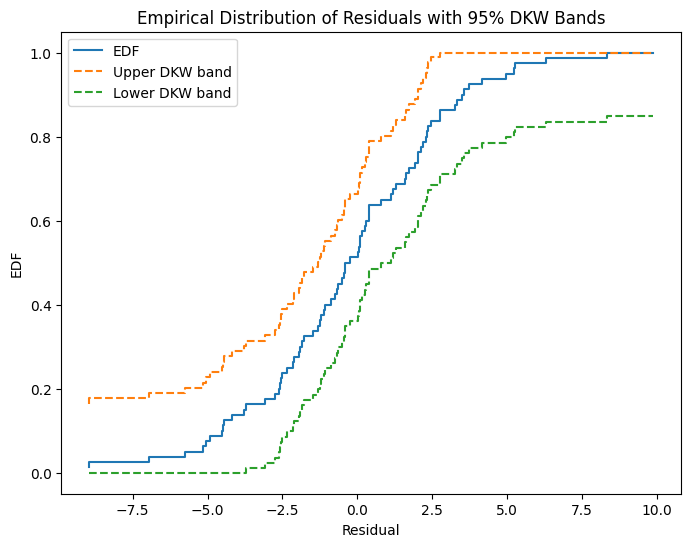

DKW epsilon: 0.1518403654770763


In [96]:
# Part 6
# Put the code for part 6 below this line

import numpy as np
import matplotlib.pyplot as plt

# Compute residuals
residuals = problem2_y_test - problem2_y_pred
res_sorted = np.sort(residuals)
n = len(res_sorted)

# Empirical distribution function
edf = np.arange(1, n + 1) / n

# DKW bound (alpha = 0.05)
alpha = 0.05
epsilon = np.sqrt((1 / (2 * n)) * np.log(2 / alpha))

upper = np.clip(edf + epsilon, 0, 1)
lower = np.clip(edf - epsilon, 0, 1)

# Plot EDF with bands
plt.figure(figsize=(8, 6))
plt.step(res_sorted, edf, label="EDF")
plt.step(res_sorted, upper, linestyle='--', label="Upper DKW band")
plt.step(res_sorted, lower, linestyle='--', label="Lower DKW band")
plt.xlabel("Residual")
plt.ylabel("EDF")
plt.title("Empirical Distribution of Residuals with 95% DKW Bands")
plt.legend()
plt.show()

print("DKW epsilon:", epsilon)


## 2.6 Exam vB, PROBLEM 3  
Maximum Points = 13  

### 2.7 Random variable generation

1. **[4p]** Using inversion sampling, construct 1000 samples from the below distribution  

$$
F[x] =
\begin{cases}
0, & x \le 0 \\
e^x - 1, & 0 < x < \ln(2) \\
1, & x \ge \ln(2)
\end{cases}
$$

2. **[2p]** Use the above 1000 samples to estimate the mean and variance.

3. **[4p]** Using the Accept–Reject sampler (Algorithm 1 in TFDS notes) construct 1000 samples  
   from the same distribution.  
   What proposal distribution did you choose and why?  
   What proportion of samples were accepted?

4. **[3p]** Explain if it is possible to sample from the density  

$$
f(x) = C e^{-(x^2 - 2)^2}
$$

using the Accept–Reject sampler (Algorithm 1 in TFDS notes) with sampling density  
given by the Gaussian.  
Here \( C \) is a constant to make sure that \( f \) is a density, and it is between roughly  
1.34 and 1.35.


---

## 1. \[4p\]

Using inversion sampling, construct 1000 samples from the below distribution

$$
F[x] =
\begin{cases}
0, & x \le 0 \\
e^x - 1, & 0 < x < \ln(2) \\
1, & x \ge \ln(2)
\end{cases}
$$

### **Step-by-step solution**

We use the inversion sampling method:  
generate $(U \sim \text{Uniform}(0,1))$ and compute

$$
X = F^{-1}(U).
$$

To find the inverse, solve

$$
u = e^x - 1 \quad \Rightarrow \quad e^x = u + 1.
$$

Taking the natural logarithm:

$$
x = \ln(1 + u).
$$

Thus the inverse CDF is

$$
F^{-1}(u) = \ln(1 + u), \quad u \in (0,1).
$$

We now generate 1000 independent samples \(U_i \sim \text{Uniform}(0,1)\) and set

$$
X_i = \ln(1 + U_i).
$$

### **Code**

```python
# Part 1
import numpy as np

u = np.random.rand(1000)
problem3_samples = np.log(1 + u)
```

---


In [97]:
# Part 1
# Write your code below
# Part 1
# Put the resulting samples into the following variable
import numpy as np


u = np.random.rand(1000)
print("Length of u: ", len(u))
problem3_samples = np.log(1 + u)
#print("Mean: ", problem3_samples.mean())

Length of u:  1000


2. **[2p]** Use the above 1000 samples to estimate the mean and variance.

In [98]:
# Part 2
problem3_mean = np.mean(problem3_samples)

# If your course prefers the unbiased estimator you would instead use:
# np.var(problem3_samples, ddof=1)
problem3_variance = np.var(problem3_samples)

# Also correct!
mean_test = (1/len(problem3_samples)) * np.sum(problem3_samples)

print("Mean: ", problem3_mean)
print("Mean test; ", mean_test)
print("Variance: ", problem3_variance)

Mean:  0.37595981877910756
Mean test;  0.37595981877910756
Variance:  0.04087776222610925


3. **[4p]** Using the Accept–Reject sampler (Algorithm 1 in TFDS notes) construct 1000 samples  
   from the same distribution.  
   What proposal distribution did you choose and why?  
   What proportion of samples were accepted?

---

## 3. \[4p\]

Using the Accept–Reject sampler (Algorithm 1 in TFDS notes) construct 1000 samples  
from the same distribution as in part 1.  
What proposal distribution did you choose and why?  
What proportion of samples were accepted?

We want to sample from the density

$$
f(x) = e^x, \quad 0 < x < \ln(2),
$$

which integrates to 1 on $((0, \ln(2)))$.

### Choice of proposal distribution

We choose a uniform proposal on the same support:

$$
g(x) = \frac{1}{\ln(2)}, \quad 0 < x < \ln(2),
$$

corresponding to

$$
Y \sim \text{Uniform}(0, \ln(2)).
$$

This proposal is chosen because

- it has the same support as $(f)$,
- it is easy to sample from,
- it allows a simple bound for the accept–reject method.

### Envelope constant \(M\)

We need a constant $(M)$ such that

$$
f(x) \le M g(x) \quad \text{for all } x \in (0, \ln(2)).
$$

We compute

$$
\frac{f(x)}{g(x)} = \frac{e^x}{1 / \ln(2)} = e^x \ln(2),
$$

which is maximized at $(x = \ln(2))$:

$$
\max_{x \in (0, \ln(2))} e^x \ln(2) = e^{\ln(2)} \ln(2) = 2 \ln(2).
$$

Thus we can take

$$
M = 2 \ln(2).
$$

### Acceptance probability

The accept–reject algorithm accepts a proposal $(Y)$ if

$$
U \le \frac{f(Y)}{M g(Y)}
$$

for an independent $(U \sim \text{Uniform}(0,1))$. Here,

$$
\frac{f(Y)}{M g(Y)}
=
\frac{e^Y}{2 \ln(2) \cdot \frac{1}{\ln(2)}}
=
\frac{e^Y}{2}.
$$

So the acceptance rule is

$$
U \le \frac{e^Y}{2}.
$$

The theoretical acceptance rate with this tight constant is

$$
\text{Acceptance rate} = \frac{1}{M} = \frac{1}{2 \ln(2)} \approx 0.72.
$$

### Code

```python
# Part 3
# Using Accept–Reject sampling to generate 1000 samples from f(x) = e^x on (0, ln(2))

import numpy as np

a = 0.0
b = np.log(2.0)

M = 2.0 * np.log(2.0)  # envelope constant, not actually needed in the code since it simplifies
samples = []
n_accepted = 0
n_proposed = 0

while n_accepted < 1000:
    # Propose from g(x) = Uniform(0, ln(2))
    y = np.random.uniform(a, b)
    
    # Draw U ~ Uniform(0, 1)
    u = np.random.rand()
    
    # Acceptance test: U <= f(y) / (M * g(y)) = exp(y) / 2
    if u <= np.exp(y) / 2.0:
        samples.append(y)
        n_accepted += 1
    
    n_proposed += 1

problem3_samples_accept_reject = np.array(samples)
problem3_acceptance_rate = n_accepted / n_proposed

problem3_acceptance_rate
```

Here:

- `problem3_samples_accept_reject` contains the 1000 samples generated by the Accept–Reject method.
- `problem3_acceptance_rate` is the empirical proportion of accepted proposals.

---


In [99]:
import numpy as np

a = 0.0
b = np.log(2.0)

M = 2.0 * np.log(2.0)  # envelope constant, not actually needed in the code since it simplifies
samples = []
n_accepted = 0
n_proposed = 0

while n_accepted < 1000:
    # Propose from g(x) = Uniform(0, ln(2))
    y = np.random.uniform(a, b)
    
    # Draw U ~ Uniform(0, 1)
    u = np.random.rand()
    
    # Acceptance test: U <= f(y) / (M * g(y)) = exp(y) / 2
    if u <= np.exp(y) / 2.0:
        samples.append(y)
        n_accepted += 1
    
    n_proposed += 1

problem3_samples_accept_reject = np.array(samples)
problem3_acceptance_rate = n_accepted / n_proposed

problem3_acceptance_rate


# Here:
#problem3_samples_accept_reject` contains the 1000 samples generated by the Accept–Reject method.
#problem3_acceptance_rate` is the empirical proportion of accepted proposals.

0.7092198581560284

### 3 Part 3  
Double click this cell and write your answer for part 3 below,  
explain what proposal distribution you chose and why you can choose it.


4. **[3p]** Explain if it is possible to sample from the density  

$$
f(x) = C e^{-(x^2 - 2)^2}
$$

using the Accept–Reject sampler (Algorithm 1 in TFDS notes) with sampling density  
given by the Gaussian.  
Here \( C \) is a constant to make sure that \( f \) is a density, and it is between roughly  
1.34 and 1.35.